In [98]:
import chipwhisperer as cw
import h5py
from tqdm.notebook import tnrange
import numpy as np
from binascii import hexlify
import os


In [100]:
SCOPETYPE = 'CWNANO'
PLATFORM = 'CWNANO'
CRYPTO_TARGET = 'TINYAES128C'
SS_VER = 'SS_VER_2_1'

In [22]:
!find ~/ -name "Setup_Generic.ipynb"

/Users/andrekittang//A-BachelorProject/chipwhisperer-jupyter/Setup_Scripts/Setup_Generic.ipynb
/Users/andrekittang//A-BachelorProject/chipwhisperer-jupyter/Helper_Scripts/Setup_Generic.ipynb
/Users/andrekittang//A-BachelorProject/chipwhisperer/jupyter/Setup_Scripts/Setup_Generic.ipynb
/Users/andrekittang//A-BachelorProject/chipwhisperer/jupyter/Helper_Scripts/Setup_Generic.ipynb


In [102]:
%run "/Users/andrekittang//A-BachelorProject/chipwhisperer-jupyter/Setup_Scripts/Setup_Generic.ipynb"

INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.
INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.
INFO: Found ChipWhisperer😍


In [28]:
!find ~/ -name "simpleserial-aes"


/Users/andrekittang//A-BachelorProject/chipwhisperer/firmware/mcu/simpleserial-aes
/Users/andrekittang//A-BachelorProject/chipwhisperer/firmware/mcu/simpleserial-aes/ide_projects/stm32f4/simpleserial-aes
/Users/andrekittang//A-BachelorProject/chipwhisperer/firmware/mcu/numicro8051/simpleserial-aes


In [104]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$SS_VER"
cd /Users/andrekittang//A-BachelorProject/chipwhisperer/firmware/mcu/simpleserial-aes
make PLATFORM=$1 CRYPTO_TARGET=$2 SS_VER=$3 -j

Building for platform CWNANO with CRYPTO_TARGET=TINYAES128C
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
Blank crypto options, building for AES128
arm-none-eabi-gcc (Arm GNU Toolchain 14.2.Rel1 (Build arm-14.52)) 14.2.1 20241119
Copyright (C) 2024 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

mkdir -p objdir-CWNANO 
.
Welcome to another exciting ChipWhisperer target build!!
.
.
.
.
.
Compiling:
Compiling:
Compiling:
Compiling:
-en     simpleserial-aes.c ...
-en     .././hal//stm32f0_nano/stm32f0_hal_nano.c ...
-en     .././hal//stm32f0/stm32f0_hal_lowlevel.c ...
-en     .././crypto/tiny-AES128-C/aes.c ...
Compiling:
.
.
-en     .././simpleserial/simpleserial.c ...
Compiling:
Assembling: .././hal//stm32f0/stm32f0_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m0 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -ffunction-sections -DF_CPU=7372800 -W

/Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/bin/ld: /Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-closer.o): in function `_close_r':
closer.c:(.text._close_r+0xc): warning: _close is not implemented and will always fail


/Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/bin/ld: /Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-closer.o): note: the message above does not take linker garbage collection into account
/Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/bin/ld: /Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-lseekr.o): note: the message above does not take linker garbage collection into account
/Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/bin/ld: /Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_n

/Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/bin/ld: /Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-lseekr.o): in function `_lseek_r':
lseekr.c:(.text._lseek_r+0x10): warning: _lseek is not implemented and will always fail
/Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/bin/ld: /Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-readr.o): in function `_read_r':
readr.c:(.text._read_r+0x10): warning: _read is not implemented and will always fail
/Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/bin/ld: /Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none

/Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/bin/ld: /Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-writer.o): note: the message above does not take linker garbage collection into account


/Applications/ArmGNUToolchain/14.2.rel1/arm-none-eabi/bin/../lib/gcc/arm-none-eabi/14.2.1/../../../../arm-none-eabi/bin/ld: warning: simpleserial-aes-CWNANO.elf has a LOAD segment with RWX permissions


-e Done!
.
.
.
.
Creating load file for Flash: simpleserial-aes-CWNANO.bin
arm-none-eabi-objcopy -O binary -R .eeprom -R .fuse -R .lock -R .signature simpleserial-aes-CWNANO.elf simpleserial-aes-CWNANO.bin
Creating load file for EEPROM: simpleserial-aes-CWNANO.eep
Creating Extended Listing: simpleserial-aes-CWNANO.lss
arm-none-eabi-objdump -h -S -z simpleserial-aes-CWNANO.elf > simpleserial-aes-CWNANO.lss
arm-none-eabi-objcopy -j .eeprom --set-section-flags=.eeprom="alloc,load" \
	--change-section-lma .eeprom=0 --no-change-warnings -O ihex simpleserial-aes-CWNANO.elf simpleserial-aes-CWNANO.eep || exit 0
Creating load file for Flash: simpleserial-aes-CWNANO.hex
arm-none-eabi-objcopy -O ihex -R .eeprom -R .fuse -R .lock -R .signature simpleserial-aes-CWNANO.elf simpleserial-aes-CWNANO.hex
.
Creating Symbol Table: simpleserial-aes-CWNANO.sym
arm-none-eabi-nm -n simpleserial-aes-CWNANO.elf > simpleserial-aes-CWNANO.sym
Size after:
   text	   data	    bss	    dec	    hex	filename
   5400	 

Manuellt setup

In [94]:
import chipwhisperer as cw
import time

# --- Step 1: Initialize Scope ---
try:
    scope = cw.scope()
except NameError:
    scope = cw.scope()

# Ensure proper connection
try:
    if not scope.connectStatus:
        scope.con()
except AttributeError:
    print("Scope not initialized properly. Reconnecting...")
    scope = cw.scope()

# --- Step 2: Set Target Type ---
SS_VER = "SS_VER_2_1"
target_type = cw.targets.SimpleSerial

# Connect to Target
try:
    target = cw.target(scope, target_type)
except Exception as e:
    print(f"INFO: Error connecting to target: {e}")
    print("INFO: Resetting scope and retrying...")
    scope = cw.scope()
    target = cw.target(scope, target_type)

# --- Step 3: Flash Firmware ---
FIRMWARE_PATH = "/Users/andrekittang/A-BachelorProject/chipwhisperer/firmware/mcu/simpleserial-aes"
PLATFORM = "CWNANO"

fw_path = "{}/simpleserial-aes-{}.hex".format(FIRMWARE_PATH, PLATFORM)

print(f"🚀 Flashing Firmware: {fw_path}")
prog = cw.programmers.STM32FProgrammer

def reset_target(scope):
    scope.io.nrst = 'low'
    time.sleep(0.05)
    scope.io.nrst = 'high_z'
    time.sleep(0.05)

scope.default_setup()
cw.program_target(scope, prog, fw_path)
target.output_len = 32

print("✅ ChipWhisperer successfully connected and firmware flashed!")

🚀 Flashing Firmware: /Users/andrekittang/A-BachelorProject/chipwhisperer/firmware/mcu/simpleserial-aes/simpleserial-aes-CWNANO.hex
Detected known STMF32: STM32F03xx4/03xx6
Extended erase (0x44), this can take ten seconds or more
Attempting to program 5935 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 5935 bytes
✅ ChipWhisperer successfully connected and firmware flashed!


In [81]:
!find ~/ -name "*.hex"


/Users/andrekittang//A-BachelorProject/chipwhisperer-jupyter/courses/sca203/AES-f4.hex
/Users/andrekittang//A-BachelorProject/chipwhisperer-jupyter/courses/sca203/AES.hex
/Users/andrekittang//A-BachelorProject/chipwhisperer-jupyter/courses/sca203/AES-xmega.hex
/Users/andrekittang//A-BachelorProject/chipwhisperer-jupyter/courses/sca203/AES-mbed.hex
/Users/andrekittang//A-BachelorProject/chipwhisperer/firmware/mcu/basic-passwdcheck/basic-passwdcheck-CWNANO.hex
/Users/andrekittang//A-BachelorProject/chipwhisperer/firmware/mcu/basic-passwdcheck/.ipynb_checkpoints/basic-passwdcheck-CWNANO-checkpoint.hex
/Users/andrekittang//A-BachelorProject/chipwhisperer/firmware/mcu/simpleserial-base/simpleserial-base-CWNANO.hex
/Users/andrekittang//A-BachelorProject/chipwhisperer/firmware/mcu/simpleserial-base-lab2/.ipynb_checkpoints/simpleserial-base-CWNANO-checkpoint.hex
/Users/andrekittang//A-BachelorProject/chipwhisperer/firmware/mcu/simpleserial-base-lab2/simpleserial-base-CWNANO.hex
/Users/andrekit

In [106]:
cw.program_target(scope, prog, "/Users/andrekittang//A-BachelorProject/chipwhisperer/firmware/mcu/simpleserial-aes/simpleserial-aes-CWNANO.hex".format(PLATFORM))

Detected known STMF32: STM32F03xx4/03xx6
Extended erase (0x44), this can take ten seconds or more
Attempting to program 5935 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 5935 bytes


Gjort veldig lite med scriptet skal se om det funker uten modifikasjon.

In [136]:
import h5py
from tqdm.notebook import tnrange
import numpy as np
from binascii import hexlify
import os

num_traces = 1000000 
profile = True

# Define implementation variable
implementation = "tinyAES"

# Ensure the traces directory exists
os.makedirs("traces", exist_ok=True)

path = f"traces/{implementation}-{num_traces}-diff{'-profile' if profile else ''}.hdf5"
print(path)

# 🔹 Delete old file if it exists


# 🔹 Create new HDF5 file
with h5py.File(path, 'w') as f:
    f.attrs["trace_type"] = "profile" if profile else "attack"
    f.attrs["data_type"] = "plaintexts different"
    f.attrs["implementation"] = implementation

    trace_set = f.create_dataset("trace", (num_traces, scope.adc.samples), dtype=np.int16)
    data_set = f.create_dataset("data", (num_traces, 16), dtype=np.uint8)  # Ensure plaintext is 16 bytes
    ktp = cw.ktp.Basic()
    
    # Initialize first key
    encryption_key = bytearray(ktp.next_key()[:16])  # Ensure key is exactly 16 bytes and convert to bytearray
    assert len(encryption_key) == 16, f"❌ Key length is {len(encryption_key)} bytes, expected 16"
    
    target.set_key(encryption_key)
    print(f"🔑 Initial AES key set: {list(encryption_key)}")

    if profile:
        ktp.fixed_key = False
        key_set = f.create_dataset("key", (num_traces, 16), dtype=np.uint8)
    else:
        ktp.fixed_key = True
        f.attrs["key"] = np.array(encryption_key, dtype=np.uint8)
    
    for i in tnrange(num_traces, desc='Capturing traces'):
        # Change key every 500 plaintexts
        if i % 500 == 0 and i != 0:
            encryption_key = bytearray(ktp.next_key()[:16])  # Ensure new key is 16 bytes and convert to bytearray
            assert len(encryption_key) == 16, f"❌ Key length is {len(encryption_key)} bytes, expected 16"
            
            target.set_key(encryption_key)
            print(f"🔑 New AES key set at trace {i}: {bytearray(encryption_key)}")

        trace = None
        while trace is None:
            pt = bytearray(ktp.next_text()[:16])  # Ensure plaintext is 16 bytes and convert to bytearray
            assert len(pt) == 16, f"❌ Plaintext length is {len(pt)} bytes, expected 16"
            
            trace = cw.capture_trace(scope, target, pt, key=encryption_key, as_int=True)
        
        data_set[i] = np.array(trace.textin[:16])  # Store only 16 bytes of plaintext
        trace_set[i] = trace.wave
        
        if profile:
            key_set[i] = np.array(trace.key[:16])


traces/tinyAES-1000000-diff-profile.hdf5
🗑️ Deleted existing file: traces/tinyAES-1000000-diff-profile.hdf5
🔑 Initial AES key set: [43, 126, 21, 22, 40, 174, 210, 166, 171, 247, 21, 136, 9, 207, 79, 60]


Capturing traces:   0%|          | 0/1000000 [00:00<?, ?it/s]

🔑 New AES key set at trace 500: bytearray(b'VM\xe6\xe5\xc6^\x80\xdf\x94Q\xb3\xd2nb\x0f\x80')
🔑 New AES key set at trace 1000: bytearray(b'\xecp0\x1fr\xe8\x9b\x9e?\x93\x07\\q\x1e\xd8\xd9')
🔑 New AES key set at trace 1500: bytearray(b'\xc3\xca\xee\xc0\xd7\xd6S\x9f\xd8\xc7\xda2\rd\xf5W')
🔑 New AES key set at trace 2000: bytearray(b'\xf2\xcfeU<o\x8d>}\xbe\xdd$=b\xdb\x10')
🔑 New AES key set at trace 2500: bytearray(b'\x9d{\x06\xe7\xca\x0b\xfc|r\x96\xcd\xf7#\xc6\x1f\xed')
🔑 New AES key set at trace 3000: bytearray(b'|\xe2\xd0\xe3\x80Y\xbebG\xec\xba\xadu\xfc\xe9\xd8')
🔑 New AES key set at trace 3500: bytearray(b'R8\x0c0\xc3\x8f\x02\xcav\xda\x1e\xf8\xdf\xff\xef\xfd')
🔑 New AES key set at trace 4000: bytearray(b'\xff5V&C#]X\xa6}T\xf7\x026\x892')
🔑 New AES key set at trace 4500: bytearray(b'L9@.\xe5\x0e\x04nm\x92B\xcb\x9e[\xf8\x83')
🔑 New AES key set at trace 5000: bytearray(b'\x7f\x14\x95\xd5\x81\xa7C\xa3\xf8\xac\x82m\xc9\xc6\x8e\xd8')
🔑 New AES key set at trace 5500: bytearray(b'\xa8\xe6\xbb\x

Funksjoner for å se på data

In [118]:
import os

hdf5_filename = "traces/tinyAES-1000000-diff-profile.hdf5"  # Update with your actual filename

if os.path.exists(hdf5_filename):
    print("✅ HDF5 file exists:", hdf5_filename)
else:
    print("❌ HDF5 file not found!")

✅ HDF5 file exists: traces/tinyAES-1000000-diff-profile.hdf5


In [120]:
import h5py

with h5py.File(hdf5_filename, "r") as f:
    print("📂 Datasets in the HDF5 file:")
    for dataset in f.keys():
        print(f"🔹 {dataset}: shape {f[dataset].shape}, dtype {f[dataset].dtype}")

📂 Datasets in the HDF5 file:
🔹 data: shape (1000000, 32), dtype uint8
🔹 key: shape (1000000, 16), dtype uint8
🔹 trace: shape (1000000, 5000), dtype int16


for å se hvor mange som var lagret

In [124]:
with h5py.File(hdf5_filename, "r") as f:
    num_traces = f["trace"].shape[0]
    num_samples = f["trace"].shape[1] if num_traces > 0 else 0
    print(f"📊 Number of traces: {num_traces}")
    print(f"📊 Samples per trace: {num_samples}")

📊 Number of traces: 1000000
📊 Samples per trace: 5000


print 1 plaintext, 1 key og dei første 10 traces´ene

In [129]:
with h5py.File(hdf5_filename, "r") as f:
    print("🔑 First AES Key:", f["key"][0] if "key" in f else "Fixed Key Used")
    print("📝 First Plaintext:", f["data"][0])
    print("📊 First 10 Power Samples:", f["trace"][0][:10])

🔑 First AES Key: [ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
📝 First Plaintext: [ 85  89   0 174 185 251  24 153 145 137  17 137 231  82  20  22 168 215
 149 228 197 194 115  20  86  39 165  55 248  77 134  21]
📊 First 10 Power Samples: [110 162 122 114 153 137 115 123 105  83]


Vis dei første

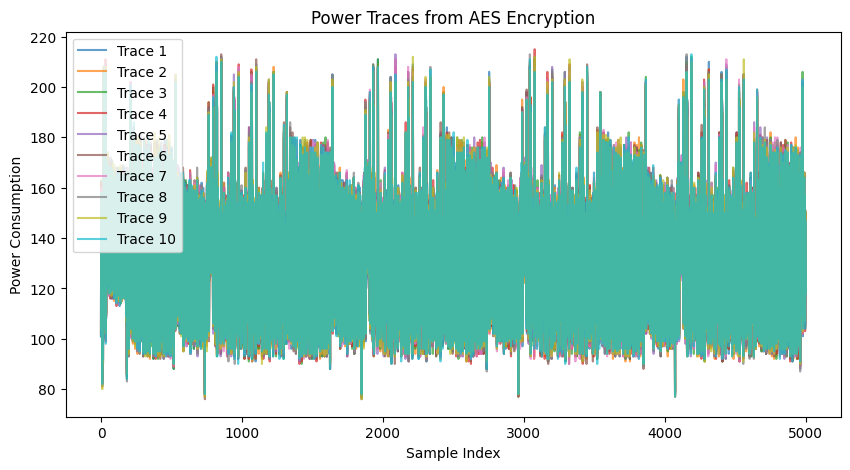

In [132]:
import matplotlib.pyplot as plt

with h5py.File(hdf5_filename, "r") as f:
    traces = f["trace"][:10]  # Load first 10 traces

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(traces[i], alpha=0.7, label=f"Trace {i+1}")

plt.xlabel("Sample Index")
plt.ylabel("Power Consumption")
plt.title("Power Traces from AES Encryption")
plt.legend()
plt.show()

Sjekk for fil størrelse

In [141]:
import os

file_path = "traces/tinyAES-1000000-diff-profile.hdf5"  # Update with your actual file path

if os.path.exists(file_path):
    file_size = os.path.getsize(file_path)  # File size in bytes
    print(f"📂 File Size: {file_size / (1024**3):.2f} GB ({file_size / (1024**2):.2f} MB)")
else:
    print("❌ File not found!")

📂 File Size: 9.34 GB (9567.27 MB)


Key converter to HEX


In [144]:
key = bytearray(b'\x9d{\x06\xe7\xca\x0b\xfc|r\x96\xcd\xf7#\xc6\x1f\xed')

# Convert to uppercase hex string
hex_key = key.hex().upper()
print(hex_key)  # Outputs: '9D7B06E7CA0BFC7C7296CDF723C61FED'

# Format with spaces for readability
formatted_key = ' '.join(f'{b:02X}' for b in key)
print(formatted_key)  # Outputs: '9D 7B 06 E7 CA 0B FC 7C 72 96 CD F7 23 C6 1F ED'

9D7B06E7CA0BFC7C7296CDF723C61FED
9D 7B 06 E7 CA 0B FC 7C 72 96 CD F7 23 C6 1F ED
